**Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1.Convert text to lowercase and remove punctuaƟon using re.
2.Tokenize the text into words and sentences.
3.Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4.Remove stopwords (using NLTK's stopwords list).
5.Display word frequency distribuƟon (excluding stopwords).**

In [8]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')



import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

paragraph = """I love exploring artificial intelligence because it constantly evolves and improves.
AI powers tools like smart assistants, recommendation systems, and autonomous vehicles.
It's fascinating how machines can now recognize speech, translate languages, and even create art.
The ethical implications of AI also make it a deeply thought-provoking subject.
With rapid advancements, it feels like we are living in the future.
I enjoy learning and working on AI-related projects."""

lower_nopunct = re.sub(r'[^\w\s]', '', paragraph.lower())
print("Lowercase without punctuation:\n", lower_nopunct)

sentences = sent_tokenize(paragraph)
words = word_tokenize(paragraph)
print("\nSentences:", sentences)
print("Words:", words)

split_words = lower_nopunct.split()
tokenized_words = word_tokenize(paragraph.lower())
print("\nUsing split():", split_words)
print("Using word_tokenize():", tokenized_words)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokenized_words if word.isalpha() and word not in stop_words]
print("\nWithout stopwords:", filtered_words)

freq = FreqDist(filtered_words)
print("\nTop 10 frequent words:", freq.most_common(10))
print("\n")




Lowercase without punctuation:
 i love exploring artificial intelligence because it constantly evolves and improves 
ai powers tools like smart assistants recommendation systems and autonomous vehicles 
its fascinating how machines can now recognize speech translate languages and even create art 
the ethical implications of ai also make it a deeply thoughtprovoking subject 
with rapid advancements it feels like we are living in the future 
i enjoy learning and working on airelated projects

Sentences: ['I love exploring artificial intelligence because it constantly evolves and improves.', 'AI powers tools like smart assistants, recommendation systems, and autonomous vehicles.', "It's fascinating how machines can now recognize speech, translate languages, and even create art.", 'The ethical implications of AI also make it a deeply thought-provoking subject.', 'With rapid advancements, it feels like we are living in the future.', 'I enjoy learning and working on AI-related projects.']
Wo

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Q2. Using the same paragraph from Q1:
1.Extract all words with only alphabets using re.findall()
2.Remove stop words using NLTK’s stopword list
3.Perform stemming with PorterStemmer
4.Perform lemmaƟzaƟon with WordNetLemmaƟzer
5.Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.**

In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

paragraph = """I love exploring artificial intelligence because it constantly evolves and improves.
AI powers tools like smart assistants, recommendation systems, and autonomous vehicles.
It's fascinating how machines can now recognize speech, translate languages, and even create art.
The ethical implications of AI also make it a deeply thought-provoking subject.
With rapid advancements, it feels like we are living in the future.
I enjoy learning and working on AI-related projects."""

# 1. Extract alphabetic words
words = word_tokenize(paragraph.lower())
alpha_words = [word for word in words if word.isalpha()]

# 2. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alpha_words if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_words]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

# 5. Comparison
print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemmed: ['love', 'explor', 'artifici', 'intellig', 'constantli', 'evolv', 'improv', 'ai', 'power', 'tool', 'like', 'smart', 'assist', 'recommend', 'system', 'autonom', 'vehicl', 'fascin', 'machin', 'recogn', 'speech', 'translat', 'languag', 'even', 'creat', 'art', 'ethic', 'implic', 'ai', 'also', 'make', 'deepli', 'subject', 'rapid', 'advanc', 'feel', 'like', 'live', 'futur', 'enjoy', 'learn', 'work', 'project']
Lemmatized: ['love', 'exploring', 'artificial', 'intelligence', 'constantly', 'evolves', 'improves', 'ai', 'power', 'tool', 'like', 'smart', 'assistant', 'recommendation', 'system', 'autonomous', 'vehicle', 'fascinating', 'machine', 'recognize', 'speech', 'translate', 'language', 'even', 'create', 'art', 'ethical', 'implication', 'ai', 'also', 'make', 'deeply', 'subject', 'rapid', 'advancement', 'feel', 'like', 'living', 'future', 'enjoy', 'learning', 'working', 'project']


**Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1.Use CountVectorizer to generate the Bag of Words representaƟon.
2.Use TfidfVectorizer to compute TF-IDF scores.
3.Print and interpret the top 3 keywords from each text using TF-IDF.**


In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The camera quality is excellent and battery lasts long.",
    "Terrible service, I had to wait for hours.",
    "Affordable price and smooth performance overall."
]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("Bag of Words:")
print(cv.get_feature_names_out())
print(bow.toarray())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
print("\nTF-IDF:")
print(tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())

# 3. Top 3 keywords per text
import numpy as np
for i, row in enumerate(tfidf_matrix.toarray()):
    top3 = np.argsort(row)[::-1][:3]
    keywords = [tfidf.get_feature_names_out()[j] for j in top3]
    print(f"Top keywords in text {i+1}: {keywords}")


Bag of Words:
['affordable' 'and' 'battery' 'camera' 'excellent' 'for' 'had' 'hours'
 'is' 'lasts' 'long' 'overall' 'performance' 'price' 'quality' 'service'
 'smooth' 'terrible' 'the' 'to' 'wait']
[[0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]]

TF-IDF:
['affordable' 'and' 'battery' 'camera' 'excellent' 'for' 'had' 'hours'
 'is' 'lasts' 'long' 'overall' 'performance' 'price' 'quality' 'service'
 'smooth' 'terrible' 'the' 'to' 'wait']
[[0.         0.25966344 0.34142622 0.34142622 0.34142622 0.
  0.         0.         0.34142622 0.34142622 0.34142622 0.
  0.         0.         0.34142622 0.         0.         0.
  0.34142622 0.         0.        ]
 [0.         0.         0.         0.         0.         0.37796447
  0.37796447 0.37796447 0.         0.         0.         0.
  0.         0.         0.         0.37796447 0.         0.37796447
  0.         0.37796447 0.37796447]
 [0.42339448 0.32200242 0

**Q4. Write 2 short texts (4–6 lines) each describing two different technologies (e.g., AI vsBlockchain).
1.Preprocess and tokenize both texts.
2.Calculate:
a.Jaccard Similarity using sets
b.Cosine Similarity using TfidfVectorizer + cosine_similarity()
c.Analyze which similarity metric gives beƩer insights in your case.**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """Artificial Intelligence allows machines to learn from data and make decisions.
It powers applications like smart assistants and self-driving cars."""

text2 = """Blockchain is a decentralized ledger technology that secures digital transactions.
It is used in cryptocurrencies and transparent data storage."""

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return set([word for word in tokens if word.isalpha() and word not in stopwords.words('english')])

set1 = preprocess(text1)
set2 = preprocess(text2)

jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)


vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text1, text2])
cos_sim = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
print("Cosine Similarity:", cos_sim)


Jaccard Similarity: 0.04
Cosine Similarity: 0.10512181647205972


**Q5. Write a short review for a product or service.
1.Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2.Classify reviews into PosiƟve / NegaƟve / Neutral.
3.Create a word cloud using the wordcloud library for all posiƟve reviews.**


Review: The product quality is amazing and delivery was quick!
Polarity: 0.5083333333333333, Subjectivity: 0.7

Review: Terrible packaging and rude customer support.
Polarity: -0.65, Subjectivity: 0.8

Review: Just okay, nothing special.
Polarity: 0.4285714285714286, Subjectivity: 0.5357142857142857

Review: Excellent value for money, highly recommend!
Polarity: 0.6, Subjectivity: 0.77

Review: Worst experience ever. Not worth the price.
Polarity: -0.575, Subjectivity: 0.55

Classified Reviews:
Positive: The product quality is amazing and delivery was quick!
Negative: Terrible packaging and rude customer support.
Positive: Just okay, nothing special.
Positive: Excellent value for money, highly recommend!
Negative: Worst experience ever. Not worth the price.


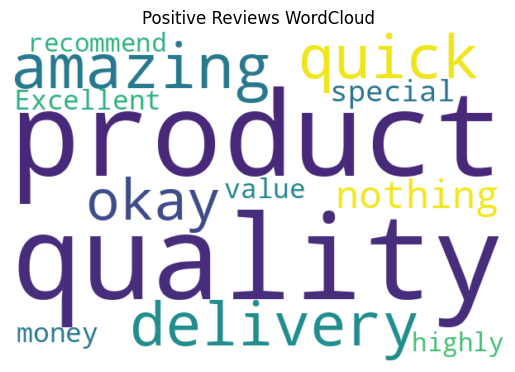

In [12]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "The product quality is amazing and delivery was quick!",
    "Terrible packaging and rude customer support.",
    "Just okay, nothing special.",
    "Excellent value for money, highly recommend!",
    "Worst experience ever. Not worth the price."
]

for r in reviews:
    blob = TextBlob(r)
    print(f"\nReview: {r}")
    print(f"Polarity: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")

def classify(polarity):
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

classified = [(r, classify(TextBlob(r).sentiment.polarity)) for r in reviews]
print("\nClassified Reviews:")
for r, label in classified:
    print(f"{label}: {r}")

positive_text = " ".join([r for r, label in classified if label == "Positive"])
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()


**Q6. Choose your own paragraph (~100 words) as training data.
1.Tokenize text using Tokenizer() from keras.preprocessing.text
2.Create input sequences and build a simple LSTM or Dense model
3.Train the model and generate 2–3 new lines of text starƟng from any seed word you
provide.**

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

paragraph = """Artificial intelligence is revolutionizing industries around the globe.
From healthcare to finance, AI is being used to predict outcomes, detect fraud, and improve efficiency.
AI-powered assistants like chatbots and virtual agents are transforming customer service.
Machine learning algorithms analyze large volumes of data to provide insights and make intelligent decisions.
With the growth of data and computing power, the potential for AI seems limitless."""


tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
words = paragraph.lower().split()
for i in range(1, len(words)):
    n_gram = words[:i+1]
    seq = tokenizer.texts_to_sequences([" ".join(n_gram)])[0]
    input_sequences.append(seq)

max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

xs = input_sequences[:, :-1]
ys = input_sequences[:, -1]
ys = np.array(ys)

model = Sequential()
model.add(Embedding(total_words, 10))
model.add(LSTM(64))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xs, ys, epochs=200, verbose=0)

seed = "artificial"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            seed += " " + word
            break

print("Generated text:", seed)


Generated text: artificial intelligence intelligence revolutionizing
